In [28]:
#Following tasks will be performed in this model
#Import Required Libraries
#Build the encoder model
#Build the decoder model
#Pre-Process the dataset
#Train the encoder
#Data Visualization

In [29]:
import tensorflow as tf

In [30]:
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

In [31]:
print('Tensorflow Version:',tf.__version__)

Tensorflow Version: 2.0.0-rc1


In [32]:
#This is the size of encoded representation
encoding_dim = 32 #32 floats-->compression of factor 24.5,assuming the input is 784 floats
#this is our input placeholder
input_img = Input(shape=(784,))

#"encoded" is the encoded representation of the input
encoded = Dense(encoding_dim,activation='relu')(input_img)

#"decoded" is the lossy reconstruction of the input
decoded =  Dense(784,activation='sigmoid')(encoded)

#This model maps an input to its reconstruction
autoencoder = Model(input_img,decoded)

In [33]:
#Build the encoder model
encoder = Model(input_img,encoded)

In [34]:
#Build the decoder model
#Create a placeholder for an encoded (32 dimensional) input
encoded_input = Input(shape=(encoding_dim,))

#retrieve the last layer of the auto-encoder model
decoder_layer = autoencoder.layers[-1]

#Create the decoder model
decoder = Model(encoded_input,decoder_layer(encoded_input))

In [36]:
autoencoder.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_8 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
##lets prepare our input data.We're using MNIST digits,and we are discarding the labels (since we are only interested in encoding/decoding the input images)

In [38]:
(x_train,_), (x_test,_) = tf.keras.datasets.mnist.load_data()

In [39]:
#Normalize all the values between 0 and 1 and we will flatten the 28*28 images into vectors of size 784

In [40]:
x_train = x_train.astype('float32') /255.
x_test = x_test.astype('float32') /255.

x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [41]:
autoencoder.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2786 - val_loss: 0.1899
Epoch 2/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.1703 - val_loss: 0.1526
Epoch 3/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.1438 - val_loss: 0.1336
Epoch 4/50
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1282 - val_loss: 0.1209
Epoch 5/50
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1178 - val_loss: 0.1125
Epoch 6/50
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1107 - val_loss: 0.1066
Epoch 7/50
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1057 - val_loss: 0.1023
Epoch 8/50
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1020 - val_loss: 0.0993


In [43]:
##Now we can try to visualize the reconstructed inputs and the encoded representations.We will use matplotlib
#encode and decode some digits
#Note that we take them from test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

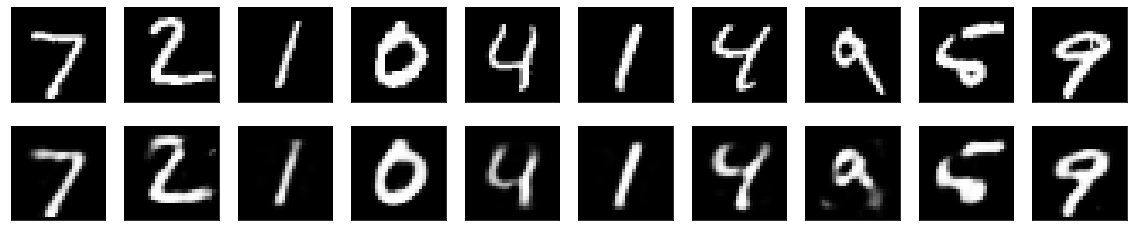

In [44]:
#use Matplotlib
import matplotlib.pyplot as plt

n = 10 # How many digits we want to display
plt.figure(figsize=(20,4))
for i in range(n):
    #display original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #display reconstruction
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
